***Problem Statement***
The dataset is similar to MNIST, but includes images of certain clothing and accessory. The objective is to classify images into specific classes using single layer perceptron and multilayer perceptron.

**Importing the necessary libraries**

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Flatten,Dropout
import matplotlib.pyplot as plt


**Preparing the dataset**

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

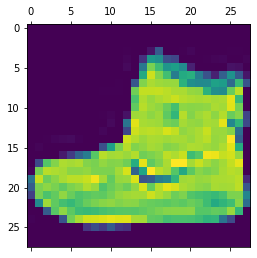

In [4]:
plt.matshow(x_train[0])

In [ ]:
y_train.shape,y_test.shape

((60000,), (10000,))

**Pre-processing the data**

In [ ]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2]).astype('float32')
x_train/=255
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2]).astype('float32')
x_test/=255

In [ ]:
x_train.shape,x_test.shape

((60000, 784), (10000, 784))

In [ ]:
#x_train[0]

In [ ]:
y_train = keras.utils.to_categorical(y_train, 10) 
y_test = keras.utils.to_categorical(y_test, 10)


**Develop a Single Layer Perceptron model**

In [ ]:
#Building the model
model1=keras.Sequential()
model1.add(Dense(10,input_shape=(784,),activation='softmax'))

In [ ]:
#compiling the model
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#Fitting the model
history1=model1.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6192 - accuracy: 0.7935 - val_loss: 0.4980 - val_accuracy: 0.8299
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4720 - accuracy: 0.8395 - val_loss: 0.4571 - val_accuracy: 0.8452
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4437 - accuracy: 0.8464 - val_loss: 0.4439 - val_accuracy: 0.8465
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4292 - accuracy: 0.8527 - val_loss: 0.4426 - val_accuracy: 0.8463
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4172 - accuracy: 0.8552 - val_loss: 0.4319 - val_accuracy: 0.8537
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4110 - accuracy: 0.8587 - val_loss: 0.4345 - val_accuracy: 0.8465
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4046 - accuracy: 0.8592 - val_loss: 0.4218 - val_accuracy:

**Plotting the curves after training**

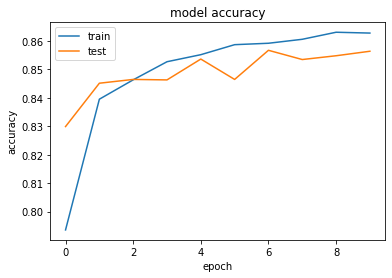

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

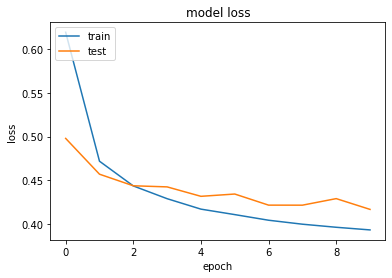

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Evaluate the model on test data**

In [ ]:
model1.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4460 - accuracy: 0.8452


[0.44601142406463623, 0.8452000021934509]

**Analyze the model summary**

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'name': 'dense_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'softmax',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense',
    'trainable': True,
    'units': 10,
    'use_bias': True}}],
 'name': 'sequential'}

**Add a hidden layer to the model to make it Multilayer Perceptron**

In [ ]:
#Building the model
model2=keras.Sequential()
model2.add(Dense(128,input_shape=(784,),activation='relu'))#hidden layer
model2.add(Dense(10,activation='softmax'))#output layer


#compiling the model
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#Fitting the model
history2=model2.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5204 - accuracy: 0.8197 - val_loss: 0.4218 - val_accuracy: 0.8538
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3868 - accuracy: 0.8611 - val_loss: 0.3956 - val_accuracy: 0.8522
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3444 - accuracy: 0.8750 - val_loss: 0.3686 - val_accuracy: 0.8711
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3198 - accuracy: 0.8830 - val_loss: 0.3741 - val_accuracy: 0.8655
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3016 - accuracy: 0.8895 - val_loss: 0.3625 - val_accuracy: 0.8733
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2858 - accuracy: 0.8962 - val_loss: 0.3310 - val_accuracy: 0.8799
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2737 - accuracy: 0.8997 - val_loss: 0.3346 - val_accuracy:

In [ ]:
model2.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3478 - accuracy: 0.8799


[0.34783482551574707, 0.8798999786376953]

**Plotting the curves**

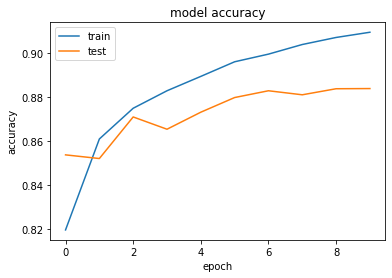

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Add Dropout to prevent overfitting and check its effect on accuracy**

In [ ]:
#Building the model
model3=keras.Sequential()
model3.add(Dense(128,input_shape=(784,),activation='relu'))#hidden layer
model3.add(Dropout(0.2))
model3.add(Dense(10,activation='softmax'))#output layer


#compiling the model
model3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#Fitting the model
history3=model3.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5578 - accuracy: 0.8032 - val_loss: 0.4103 - val_accuracy: 0.8545
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4137 - accuracy: 0.8509 - val_loss: 0.3790 - val_accuracy: 0.8654
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3757 - accuracy: 0.8635 - val_loss: 0.3521 - val_accuracy: 0.8745
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3506 - accuracy: 0.8697 - val_loss: 0.3480 - val_accuracy: 0.8772
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3340 - accuracy: 0.8769 - val_loss: 0.3384 - val_accuracy: 0.8770
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3202 - accuracy: 0.8810 - val_loss: 0.3312 - val_accuracy: 0.8818
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3123 - accuracy: 0.8840 - val_loss: 0.3354 - val_accuracy:

In [ ]:
model3.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3463 - accuracy: 0.8785


[0.3463338017463684, 0.8784999847412109]

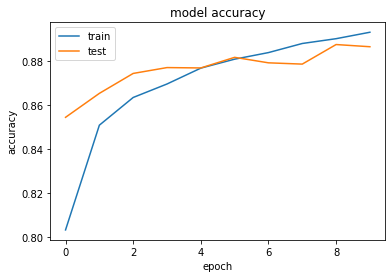

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Increase the number of hidden layer neuron and check its accuracy**

In [ ]:
#Building the model
model4=keras.Sequential()
model4.add(Dense(128,input_shape=(784,),activation='relu'))#hidden layer
model4.add(Dropout(0.2))
model4.add(Dense(64,activation='relu'))
model4.add(Dense(10,activation='softmax'))#output layer


#compiling the model
model4.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#Fitting the model
history4=model4.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 6s 3ms/step - loss: 0.5664 - accuracy: 0.7959 - val_loss: 0.4004 - val_accuracy: 0.8577
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4169 - accuracy: 0.8486 - val_loss: 0.3941 - val_accuracy: 0.8547
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3812 - accuracy: 0.8592 - val_loss: 0.3522 - val_accuracy: 0.8679
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3584 - accuracy: 0.8671 - val_loss: 0.3526 - val_accuracy: 0.8729
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3406 - accuracy: 0.8734 - val_loss: 0.3334 - val_accuracy: 0.8816
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3266 - accuracy: 0.8789 - val_loss: 0.3541 - val_accuracy: 0.8711
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3164 - accuracy: 0.8837 - val_loss: 0.3262 - val_accuracy:

**evaluating the model4**

In [ ]:
model4.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3423 - accuracy: 0.8787


[0.34234538674354553, 0.8787000179290771]

**Plotting the accuracy curves of model4**

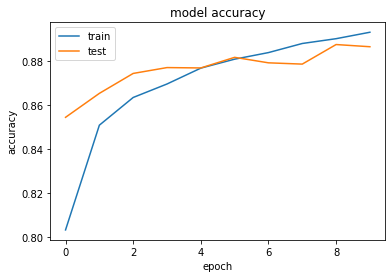

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Use different optimizers and check accuracy**


*   Rmsprop
*   Stochastic Gradient Descent



## SGD

In [ ]:
#Building the model
model5=keras.Sequential()
model5.add(Dense(128,input_shape=(784,),activation='relu'))#hidden layer
model5.add(Dropout(0.2))
model5.add(Dense(64,activation='relu'))
model5.add(Dense(10,activation='softmax'))#output layer


#compiling the model
model5.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

#Fitting the model
history5=model5.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.8808 - accuracy: 0.7034 - val_loss: 0.5608 - val_accuracy: 0.8131
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5618 - accuracy: 0.8073 - val_loss: 0.4831 - val_accuracy: 0.8317
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4971 - accuracy: 0.8259 - val_loss: 0.4521 - val_accuracy: 0.8378
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4612 - accuracy: 0.8395 - val_loss: 0.4325 - val_accuracy: 0.8474
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4369 - accuracy: 0.8464 - val_loss: 0.4146 - val_accuracy: 0.8536
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4186 - accuracy: 0.8520 - val_loss: 0.3960 - val_accuracy: 0.8570
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4034 - accuracy: 0.8551 - val_loss: 0.3947 - val_accuracy:

In [ ]:
model5.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3859 - accuracy: 0.8616


[0.3858857750892639, 0.8615999817848206]

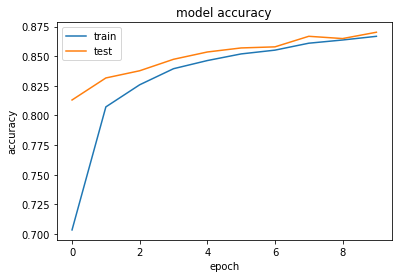

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## RMS Prop

In [ ]:
#Building the model
model6=keras.Sequential()
model6.add(Dense(128,input_shape=(784,),activation='relu'))#hidden layer
model6.add(Dropout(0.2))
model6.add(Dense(64,activation='relu'))
model6.add(Dense(10,activation='softmax'))#output layer


#compiling the model
model6.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

#Fitting the model
history6=model6.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5578 - accuracy: 0.7991 - val_loss: 0.4312 - val_accuracy: 0.8421
Epoch 2/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4256 - accuracy: 0.8464 - val_loss: 0.3836 - val_accuracy: 0.8695
Epoch 3/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3955 - accuracy: 0.8594 - val_loss: 0.3775 - val_accuracy: 0.8687
Epoch 4/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3849 - accuracy: 0.8642 - val_loss: 0.3633 - val_accuracy: 0.8773
Epoch 5/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3741 - accuracy: 0.8694 - val_loss: 0.3735 - val_accuracy: 0.8692
Epoch 6/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3723 - accuracy: 0.8714 - val_loss: 0.4197 - val_accuracy: 0.8669
Epoch 7/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3671 - accuracy: 0.8734 - val_loss: 0.3793 - val_accuracy:

In [ ]:
model6.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4496 - accuracy: 0.8597


[0.4496222138404846, 0.8597000241279602]

## **Increase the hidden layers and check its effect on accuracy**




In [ ]:
#Building the model
model7=keras.Sequential()
model7.add(Dense(128,input_shape=(784,),activation='relu'))#hidden layer
model7.add(Dropout(0.2))
model7.add(Dense(64,activation='relu'))
model7.add(Dropout(0.2))
model7.add(Dense(32,activation='relu'))
model7.add(Dense(10,activation='softmax'))#output layer


#compiling the model
model7.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

#Fitting the model
history7=model7.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.6358 - accuracy: 0.7729 - val_loss: 0.4374 - val_accuracy: 0.8372
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4603 - accuracy: 0.8378 - val_loss: 0.3881 - val_accuracy: 0.8612
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4252 - accuracy: 0.8507 - val_loss: 0.3722 - val_accuracy: 0.8672
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4123 - accuracy: 0.8561 - val_loss: 0.3860 - val_accuracy: 0.8637
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3986 - accuracy: 0.8614 - val_loss: 0.3743 - val_accuracy: 0.8688
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3930 - accuracy: 0.8641 - val_loss: 0.3742 - val_accuracy: 0.8698
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3885 - accuracy: 0.8670 - val_loss: 0.3816 - val_accuracy:

In [ ]:
model6.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4496 - accuracy: 0.8597


[0.4496222138404846, 0.8597000241279602]




```

# **Manipulate the batch_size and epochs and check its effect on accuracy**

In [ ]:
#Building the model
model8=keras.Sequential()
model8.add(Dense(128,input_shape=(784,),activation='relu'))#hidden layer
model8.add(Dropout(0.2))
model8.add(Dense(64,activation='relu'))
model8.add(Dropout(0.2))
model8.add(Dense(32,activation='relu'))
model8.add(Dense(10,activation='softmax'))#output layer


#compiling the model
model8.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#Fitting the model
history8=model8.fit(x_train,y_train,epochs=15,batch_size=64,validation_split=0.2)

Epoch 1/15
750/750 [==============================] - 4s 4ms/step - loss: 0.6686 - accuracy: 0.7611 - val_loss: 0.4310 - val_accuracy: 0.8472
Epoch 2/15
750/750 [==============================] - 3s 4ms/step - loss: 0.4532 - accuracy: 0.8373 - val_loss: 0.3945 - val_accuracy: 0.8593
Epoch 3/15
750/750 [==============================] - 3s 4ms/step - loss: 0.4089 - accuracy: 0.8527 - val_loss: 0.3764 - val_accuracy: 0.8652
Epoch 4/15
750/750 [==============================] - 3s 4ms/step - loss: 0.3819 - accuracy: 0.8616 - val_loss: 0.3594 - val_accuracy: 0.8732
Epoch 5/15
750/750 [==============================] - 3s 4ms/step - loss: 0.3665 - accuracy: 0.8669 - val_loss: 0.3592 - val_accuracy: 0.8702
Epoch 6/15
750/750 [==============================] - 3s 4ms/step - loss: 0.3563 - accuracy: 0.8699 - val_loss: 0.3535 - val_accuracy: 0.8726
Epoch 7/15
750/750 [==============================] - 3s 4ms/step - loss: 0.3468 - accuracy: 0.8718 - val_loss: 0.3303 - val_accuracy: 0.8812
Epoch 

In [ ]:
model8.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3380 - accuracy: 0.8779


[0.3380453586578369, 0.8779000043869019]

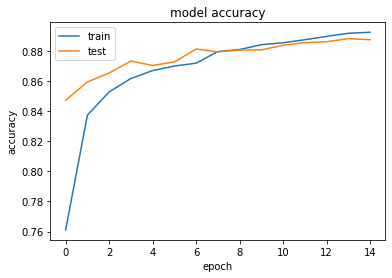

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history8.history['accuracy'])
plt.plot(history8.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**What parameters should be chosen to classify the images into various categories?**



*   Number of hidden layers
*   Number of units in hidden layers
*   activation function in hidden layer
*   activation function in output layer
*   epochs
*   optimizer
*   batch_size




